In [0]:
#https://techbrij.com/tensorflow-cnn-image-classification
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


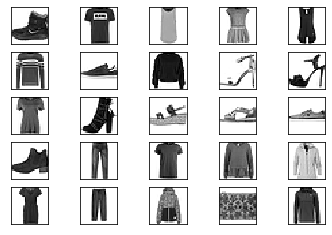

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
 
for i in range(25):    
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
     
plt.show()

In [0]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [0]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])
 
model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.3971 - accuracy: 0.8563
Epoch 2/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2586 - accuracy: 0.9054
Epoch 3/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2159 - accuracy: 0.9201
Epoch 4/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1824 - accuracy: 0.9324
Epoch 5/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1585 - accuracy: 0.9413
10000/10000 - 4s - loss: 0.2346 - accuracy: 0.9189


[0.23456908864676954, 0.9189]

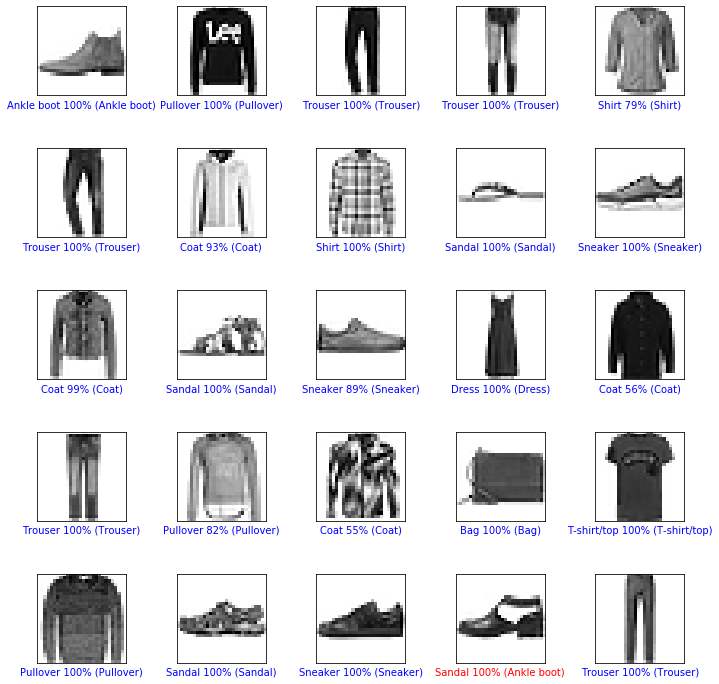

In [29]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
   
  plt.imshow(img[...,0], cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
   
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
test_images = X_test_final[:num_images]
predictions = model_with_conv.predict(test_images)
for i in range(num_images):    
    plt.subplot(num_rows, num_cols, i+1)   
    plot_image(i, predictions, y_test, test_images)    
 
plt.tight_layout()
plt.show()